In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
from custom import custom_funcs as cf
from datetime import datetime

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
G = cf.load_seventh_grader_network()

In [3]:
G.nodes(data=True)

[(1, {'gender': 'male'}),
 (2, {'gender': 'male'}),
 (3, {'gender': 'male'}),
 (4, {'gender': 'male'}),
 (5, {'gender': 'male'}),
 (6, {'gender': 'male'}),
 (7, {'gender': 'male'}),
 (8, {'gender': 'female'}),
 (9, {'gender': 'female'}),
 (10, {'gender': 'female'}),
 (11, {'gender': 'female'}),
 (12, {'gender': 'female'}),
 (13, {'gender': 'female'}),
 (14, {'gender': 'female'}),
 (15, {'gender': 'female'}),
 (16, {'gender': 'male'}),
 (17, {'gender': 'male'}),
 (18, {'gender': 'male'}),
 (19, {'gender': 'male'}),
 (20, {'gender': 'female'}),
 (21, {'gender': 'female'}),
 (22, {'gender': 'male'}),
 (23, {'gender': 'female'}),
 (24, {'gender': 'female'}),
 (25, {'gender': 'female'}),
 (26, {'gender': 'female'}),
 (27, {'gender': 'female'}),
 (28, {'gender': 'female'}),
 (29, {'gender': 'female'})]

In [4]:
print(len(G.nodes()))

29


In [5]:
G.edges(data=True)

[(1, 2, {'count': 1}),
 (1, 3, {'count': 1}),
 (1, 4, {'count': 2}),
 (1, 5, {'count': 2}),
 (1, 6, {'count': 3}),
 (1, 7, {'count': 3}),
 (1, 8, {'count': 2}),
 (1, 9, {'count': 2}),
 (1, 10, {'count': 1}),
 (1, 11, {'count': 1}),
 (1, 12, {'count': 1}),
 (1, 13, {'count': 1}),
 (1, 14, {'count': 1}),
 (1, 15, {'count': 1}),
 (2, 1, {'count': 1}),
 (2, 3, {'count': 3}),
 (2, 4, {'count': 3}),
 (2, 5, {'count': 3}),
 (2, 6, {'count': 2}),
 (2, 8, {'count': 1}),
 (2, 9, {'count': 3}),
 (2, 11, {'count': 1}),
 (2, 12, {'count': 3}),
 (2, 16, {'count': 1}),
 (2, 17, {'count': 1}),
 (2, 18, {'count': 1}),
 (2, 19, {'count': 3}),
 (2, 20, {'count': 3}),
 (2, 21, {'count': 1}),
 (3, 1, {'count': 1}),
 (3, 2, {'count': 3}),
 (3, 4, {'count': 3}),
 (3, 5, {'count': 3}),
 (3, 6, {'count': 3}),
 (3, 8, {'count': 1}),
 (3, 9, {'count': 3}),
 (3, 11, {'count': 3}),
 (3, 12, {'count': 3}),
 (3, 13, {'count': 1}),
 (3, 15, {'count': 1}),
 (3, 19, {'count': 2}),
 (3, 20, {'count': 3}),
 (3, 21, {'cou

In [6]:
G.node[1]

{'gender': 'male'}

In [7]:
G.node[21]

{'gender': 'female'}

In [8]:
#for n in G.nodes():
#    del G.node[n]

In [7]:
G.nodes(data=True)

[(1, {'gender': 'male'}),
 (2, {'gender': 'male'}),
 (3, {'gender': 'male'}),
 (4, {'gender': 'male'}),
 (5, {'gender': 'male'}),
 (6, {'gender': 'male'}),
 (7, {'gender': 'male'}),
 (8, {'gender': 'female'}),
 (9, {'gender': 'female'}),
 (10, {'gender': 'female'}),
 (11, {'gender': 'female'}),
 (12, {'gender': 'female'}),
 (13, {'gender': 'female'}),
 (14, {'gender': 'female'}),
 (15, {'gender': 'female'}),
 (16, {'gender': 'male'}),
 (17, {'gender': 'male'}),
 (18, {'gender': 'male'}),
 (19, {'gender': 'male'}),
 (20, {'gender': 'female'}),
 (21, {'gender': 'female'}),
 (22, {'gender': 'male'}),
 (23, {'gender': 'female'}),
 (24, {'gender': 'female'}),
 (25, {'gender': 'female'}),
 (26, {'gender': 'female'}),
 (27, {'gender': 'female'}),
 (28, {'gender': 'female'}),
 (29, {'gender': 'female'})]

In [8]:
G.node[21]['gender']

'female'

In [79]:
#del G.node[21]['gender']

In [80]:
#G.node[21]

In [81]:
#G.nodes(data=True)

In [9]:
for n in G.nodes():
    #del G.node[n]['gender']
    print(G.node.items())

dict_items([(1, {'gender': 'male'}), (2, {'gender': 'male'}), (3, {'gender': 'male'}), (4, {'gender': 'male'}), (5, {'gender': 'male'}), (6, {'gender': 'male'}), (7, {'gender': 'male'}), (8, {'gender': 'female'}), (9, {'gender': 'female'}), (10, {'gender': 'female'}), (11, {'gender': 'female'}), (12, {'gender': 'female'}), (13, {'gender': 'female'}), (14, {'gender': 'female'}), (15, {'gender': 'female'}), (16, {'gender': 'male'}), (17, {'gender': 'male'}), (18, {'gender': 'male'}), (19, {'gender': 'male'}), (20, {'gender': 'female'}), (21, {'gender': 'female'}), (22, {'gender': 'male'}), (23, {'gender': 'female'}), (24, {'gender': 'female'}), (25, {'gender': 'female'}), (26, {'gender': 'female'}), (27, {'gender': 'female'}), (28, {'gender': 'female'}), (29, {'gender': 'female'})])
dict_items([(1, {'gender': 'male'}), (2, {'gender': 'male'}), (3, {'gender': 'male'}), (4, {'gender': 'male'}), (5, {'gender': 'male'}), (6, {'gender': 'male'}), (7, {'gender': 'male'}), (8, {'gender': 'femal

In [83]:
#G.nodes(data=True)

In [10]:
import decimal
import random
random.seed(9001)
for n in G.nodes():
    temp = round(random.uniform(0, 1), 3)
    G.add_node(n,ViRt=temp)

In [11]:
G.nodes(data=True)

[(1, {'ViRt': 0.037, 'gender': 'male'}),
 (2, {'ViRt': 0.253, 'gender': 'male'}),
 (3, {'ViRt': 0.564, 'gender': 'male'}),
 (4, {'ViRt': 0.569, 'gender': 'male'}),
 (5, {'ViRt': 0.606, 'gender': 'male'}),
 (6, {'ViRt': 0.513, 'gender': 'male'}),
 (7, {'ViRt': 0.713, 'gender': 'male'}),
 (8, {'ViRt': 0.893, 'gender': 'female'}),
 (9, {'ViRt': 0.616, 'gender': 'female'}),
 (10, {'ViRt': 0.538, 'gender': 'female'}),
 (11, {'ViRt': 0.759, 'gender': 'female'}),
 (12, {'ViRt': 0.981, 'gender': 'female'}),
 (13, {'ViRt': 0.291, 'gender': 'female'}),
 (14, {'ViRt': 0.589, 'gender': 'female'}),
 (15, {'ViRt': 0.074, 'gender': 'female'}),
 (16, {'ViRt': 0.444, 'gender': 'male'}),
 (17, {'ViRt': 0.769, 'gender': 'male'}),
 (18, {'ViRt': 0.609, 'gender': 'male'}),
 (19, {'ViRt': 0.739, 'gender': 'male'}),
 (20, {'ViRt': 0.392, 'gender': 'female'}),
 (21, {'ViRt': 0.801, 'gender': 'female'}),
 (22, {'ViRt': 0.247, 'gender': 'male'}),
 (23, {'ViRt': 0.882, 'gender': 'female'}),
 (24, {'ViRt': 0.306,

In [12]:
for n in G.nodes():
    del G.node[n]['gender']

In [13]:
G.nodes(data=True)

[(1, {'ViRt': 0.037}),
 (2, {'ViRt': 0.253}),
 (3, {'ViRt': 0.564}),
 (4, {'ViRt': 0.569}),
 (5, {'ViRt': 0.606}),
 (6, {'ViRt': 0.513}),
 (7, {'ViRt': 0.713}),
 (8, {'ViRt': 0.893}),
 (9, {'ViRt': 0.616}),
 (10, {'ViRt': 0.538}),
 (11, {'ViRt': 0.759}),
 (12, {'ViRt': 0.981}),
 (13, {'ViRt': 0.291}),
 (14, {'ViRt': 0.589}),
 (15, {'ViRt': 0.074}),
 (16, {'ViRt': 0.444}),
 (17, {'ViRt': 0.769}),
 (18, {'ViRt': 0.609}),
 (19, {'ViRt': 0.739}),
 (20, {'ViRt': 0.392}),
 (21, {'ViRt': 0.801}),
 (22, {'ViRt': 0.247}),
 (23, {'ViRt': 0.882}),
 (24, {'ViRt': 0.306}),
 (25, {'ViRt': 0.163}),
 (26, {'ViRt': 0.635}),
 (27, {'ViRt': 0.527}),
 (28, {'ViRt': 0.52}),
 (29, {'ViRt': 0.173})]

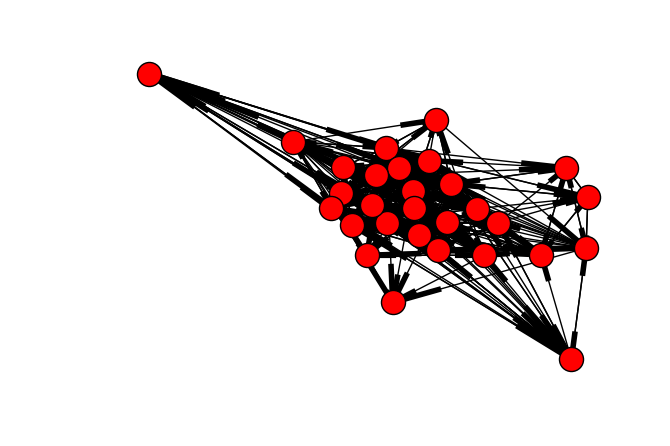

In [14]:
nx.draw(G)

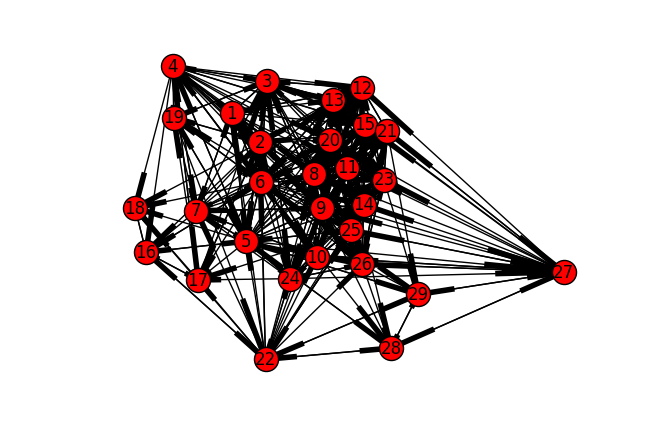

In [15]:
nx.draw(G, with_labels=True)

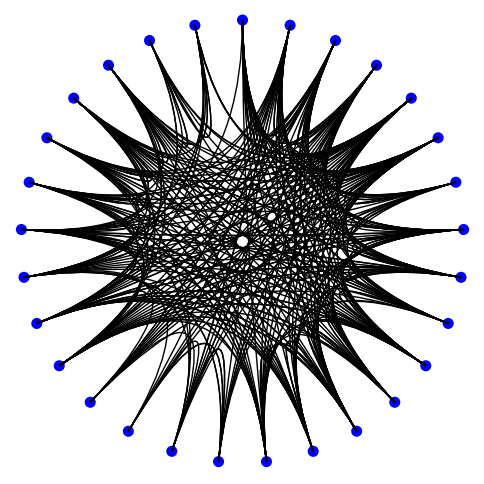

In [16]:
from circos import CircosPlot

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

nodes = sorted(G.nodes())
edges = G.edges()
#node_cmap = {'Male':'blue', 'Female':'red'}
#nodecolors = [node_cmap[G.node[n]['sex']] for n in G.nodes()]

c = CircosPlot(nodes, edges, radius=10, ax=ax, fig=fig)
c.draw()  
plt.savefig('images/paper.jpg', dpi=300)

In [17]:
for n in G.nodes():
    frnds = len(G.neighbors(n))
    G.add_node(n,friends=frnds)

In [20]:
G.nodes(data=True)

[(1, {'ViRt': 0.521, 'friends': 14}),
 (2, {'ViRt': 0.787, 'friends': 15}),
 (3, {'ViRt': 0.269, 'friends': 17}),
 (4, {'ViRt': 0.132, 'friends': 23}),
 (5, {'ViRt': 0.751, 'friends': 27}),
 (6, {'ViRt': 0.935, 'friends': 27}),
 (7, {'ViRt': 0.263, 'friends': 12}),
 (8, {'ViRt': 0.883, 'friends': 14}),
 (9, {'ViRt': 0.281, 'friends': 16}),
 (10, {'ViRt': 0.424, 'friends': 12}),
 (11, {'ViRt': 0.41, 'friends': 14}),
 (12, {'ViRt': 0.095, 'friends': 10}),
 (13, {'ViRt': 0.365, 'friends': 13}),
 (14, {'ViRt': 0.104, 'friends': 8}),
 (15, {'ViRt': 0.488, 'friends': 9}),
 (16, {'ViRt': 0.811, 'friends': 5}),
 (17, {'ViRt': 0.361, 'friends': 6}),
 (18, {'ViRt': 0.713, 'friends': 1}),
 (19, {'ViRt': 0.333, 'friends': 6}),
 (20, {'ViRt': 0.294, 'friends': 13}),
 (21, {'ViRt': 0.498, 'friends': 15}),
 (22, {'ViRt': 0.37, 'friends': 19}),
 (23, {'ViRt': 0.535, 'friends': 12}),
 (24, {'ViRt': 0.319, 'friends': 16}),
 (25, {'ViRt': 0.095, 'friends': 11}),
 (26, {'ViRt': 0.32, 'friends': 16}),
 (27

In [18]:
from random import randint
random.seed(9002)
for n in G.nodes():
    temp = randint(0,100)
    G.add_node(n,uploads=temp)

In [19]:
G.nodes(data=True)

[(1, {'ViRt': 0.037, 'friends': 14, 'uploads': 35}),
 (2, {'ViRt': 0.253, 'friends': 15, 'uploads': 82}),
 (3, {'ViRt': 0.564, 'friends': 17, 'uploads': 44}),
 (4, {'ViRt': 0.569, 'friends': 23, 'uploads': 80}),
 (5, {'ViRt': 0.606, 'friends': 27, 'uploads': 18}),
 (6, {'ViRt': 0.513, 'friends': 27, 'uploads': 48}),
 (7, {'ViRt': 0.713, 'friends': 12, 'uploads': 43}),
 (8, {'ViRt': 0.893, 'friends': 14, 'uploads': 93}),
 (9, {'ViRt': 0.616, 'friends': 16, 'uploads': 74}),
 (10, {'ViRt': 0.538, 'friends': 12, 'uploads': 72}),
 (11, {'ViRt': 0.759, 'friends': 14, 'uploads': 31}),
 (12, {'ViRt': 0.981, 'friends': 10, 'uploads': 8}),
 (13, {'ViRt': 0.291, 'friends': 13, 'uploads': 61}),
 (14, {'ViRt': 0.589, 'friends': 8, 'uploads': 4}),
 (15, {'ViRt': 0.074, 'friends': 9, 'uploads': 91}),
 (16, {'ViRt': 0.444, 'friends': 5, 'uploads': 4}),
 (17, {'ViRt': 0.769, 'friends': 6, 'uploads': 6}),
 (18, {'ViRt': 0.609, 'friends': 1, 'uploads': 93}),
 (19, {'ViRt': 0.739, 'friends': 6, 'uploads':

In [20]:
G.node[21]['friends']

15

In [21]:
G.node[21]['ViRt']

0.801

In [22]:
maxi_friends = 0
maxi_uploads = 0
for n in G.nodes():
    maxi_friends = max(maxi_friends, G.node[n]['friends'])
    maxi_uploads = max(maxi_uploads, G.node[n]['uploads'])

print(maxi_friends)
print(maxi_uploads)

27
94


In [23]:
import math
log_maxi_friends = math.log10(maxi_friends)
#log_maxi_friends = "%.3f" % log_maxi_friends
print(log_maxi_friends)
log_maxi_uploads = math.log10(maxi_uploads)
#log_maxi_uploads = "%.3f" % log_maxi_uploads
print(log_maxi_uploads)

1.4313637641589874
1.9731278535996986


In [24]:
AttrCoeff = 0.0
for n in G.nodes():
    log_uploads = math.log10(1 + G.node[n]['uploads'])
    log_friends = math.log10(1 + G.node[n]['friends'])
    bias = math.log10(2)
    AttrCoeff = ((log_uploads + log_friends)/(log_maxi_uploads + log_maxi_friends + bias))
    AttrCoeff = round(AttrCoeff, 3)
    G.add_node(n,Attractiveness_Coeff=AttrCoeff)

In [25]:
G.nodes(data=True)

[(1,
  {'Attractiveness_Coeff': 0.737,
   'ViRt': 0.037,
   'friends': 14,
   'uploads': 35}),
 (2,
  {'Attractiveness_Coeff': 0.843,
   'ViRt': 0.253,
   'friends': 15,
   'uploads': 82}),
 (3,
  {'Attractiveness_Coeff': 0.785,
   'ViRt': 0.564,
   'friends': 17,
   'uploads': 44}),
 (4,
  {'Attractiveness_Coeff': 0.888,
   'ViRt': 0.569,
   'friends': 23,
   'uploads': 80}),
 (5,
  {'Attractiveness_Coeff': 0.736,
   'ViRt': 0.606,
   'friends': 27,
   'uploads': 18}),
 (6,
  {'Attractiveness_Coeff': 0.847,
   'ViRt': 0.513,
   'friends': 27,
   'uploads': 48}),
 (7,
  {'Attractiveness_Coeff': 0.744,
   'ViRt': 0.713,
   'friends': 12,
   'uploads': 43}),
 (8,
  {'Attractiveness_Coeff': 0.85, 'ViRt': 0.893, 'friends': 14, 'uploads': 93}),
 (9,
  {'Attractiveness_Coeff': 0.838,
   'ViRt': 0.616,
   'friends': 16,
   'uploads': 74}),
 (10,
  {'Attractiveness_Coeff': 0.803,
   'ViRt': 0.538,
   'friends': 12,
   'uploads': 72}),
 (11,
  {'Attractiveness_Coeff': 0.724,
   'ViRt': 0.759,
 

In [26]:
G.edges(data=True)

[(1, 2, {'count': 1}),
 (1, 3, {'count': 1}),
 (1, 4, {'count': 2}),
 (1, 5, {'count': 2}),
 (1, 6, {'count': 3}),
 (1, 7, {'count': 3}),
 (1, 8, {'count': 2}),
 (1, 9, {'count': 2}),
 (1, 10, {'count': 1}),
 (1, 11, {'count': 1}),
 (1, 12, {'count': 1}),
 (1, 13, {'count': 1}),
 (1, 14, {'count': 1}),
 (1, 15, {'count': 1}),
 (2, 1, {'count': 1}),
 (2, 3, {'count': 3}),
 (2, 4, {'count': 3}),
 (2, 5, {'count': 3}),
 (2, 6, {'count': 2}),
 (2, 8, {'count': 1}),
 (2, 9, {'count': 3}),
 (2, 11, {'count': 1}),
 (2, 12, {'count': 3}),
 (2, 16, {'count': 1}),
 (2, 17, {'count': 1}),
 (2, 18, {'count': 1}),
 (2, 19, {'count': 3}),
 (2, 20, {'count': 3}),
 (2, 21, {'count': 1}),
 (3, 1, {'count': 1}),
 (3, 2, {'count': 3}),
 (3, 4, {'count': 3}),
 (3, 5, {'count': 3}),
 (3, 6, {'count': 3}),
 (3, 8, {'count': 1}),
 (3, 9, {'count': 3}),
 (3, 11, {'count': 3}),
 (3, 12, {'count': 3}),
 (3, 13, {'count': 1}),
 (3, 15, {'count': 1}),
 (3, 19, {'count': 2}),
 (3, 20, {'count': 3}),
 (3, 21, {'cou

In [27]:
for v1,v2,a in G.edges(data=True):
    G[v1][v2]['count'] = 1

In [28]:
G.edges(data=True)

[(1, 2, {'count': 1}),
 (1, 3, {'count': 1}),
 (1, 4, {'count': 1}),
 (1, 5, {'count': 1}),
 (1, 6, {'count': 1}),
 (1, 7, {'count': 1}),
 (1, 8, {'count': 1}),
 (1, 9, {'count': 1}),
 (1, 10, {'count': 1}),
 (1, 11, {'count': 1}),
 (1, 12, {'count': 1}),
 (1, 13, {'count': 1}),
 (1, 14, {'count': 1}),
 (1, 15, {'count': 1}),
 (2, 1, {'count': 1}),
 (2, 3, {'count': 1}),
 (2, 4, {'count': 1}),
 (2, 5, {'count': 1}),
 (2, 6, {'count': 1}),
 (2, 8, {'count': 1}),
 (2, 9, {'count': 1}),
 (2, 11, {'count': 1}),
 (2, 12, {'count': 1}),
 (2, 16, {'count': 1}),
 (2, 17, {'count': 1}),
 (2, 18, {'count': 1}),
 (2, 19, {'count': 1}),
 (2, 20, {'count': 1}),
 (2, 21, {'count': 1}),
 (3, 1, {'count': 1}),
 (3, 2, {'count': 1}),
 (3, 4, {'count': 1}),
 (3, 5, {'count': 1}),
 (3, 6, {'count': 1}),
 (3, 8, {'count': 1}),
 (3, 9, {'count': 1}),
 (3, 11, {'count': 1}),
 (3, 12, {'count': 1}),
 (3, 13, {'count': 1}),
 (3, 15, {'count': 1}),
 (3, 19, {'count': 1}),
 (3, 20, {'count': 1}),
 (3, 21, {'cou

In [29]:
import pandas as pd
import numpy as np
df = pd.read_excel("Video_Prop.xlsx")
df.head()

,video ID,uploader,age,category,length,views,video rating(on a scale of 5),number of ratings,number of comments,Pi
0,jfACnjzXc3o,DaMagicGenie,1236,Comedy,284,565,2.92,13,13,0.012813
1,uWAxLCkpPW4,SpeedUpVideos,1257,Comedy,182,2084,4.67,49,31,0.047259
2,zzAFEtwIoAw,djsvideodiarys,1248,Comedy,266,936,2.13,39,13,0.021226
3,3iguSOqYAVg,techhomo,1257,Comedy,180,447,5.00,1,13,0.010137
4,sA2kG2p9INU,Zombiesaurus666,1257,Comedy,364,80,1.00,1,3,0.001814


In [30]:
df.columns[[0, 2]]

Index(['video ID', 'age'], dtype='object')

In [31]:
df.drop(df.columns[[1,2,3,4,8,9]], axis=1, inplace=True)

In [32]:
df.head()

,video ID,views,video rating(on a scale of 5),number of ratings
0,jfACnjzXc3o,565,2.92,13
1,uWAxLCkpPW4,2084,4.67,49
2,zzAFEtwIoAw,936,2.13,39
3,3iguSOqYAVg,447,5.00,1
4,sA2kG2p9INU,80,1.00,1


In [33]:
df.rename(columns={'video ID': 'id', 'views': 'nviews', 'video rating(on a scale of 5)': 'rating', 'number of ratings': 'nrating'}, inplace=True)

In [34]:
df.head()

,id,nviews,rating,nrating
0,jfACnjzXc3o,565,2.92,13
1,uWAxLCkpPW4,2084,4.67,49
2,zzAFEtwIoAw,936,2.13,39
3,3iguSOqYAVg,447,5.00,1
4,sA2kG2p9INU,80,1.00,1


In [35]:
for a,b in df.iterrows():
    print(a,b)

0 id         jfACnjzXc3o
nviews             565
rating            2.92
nrating             13
Name: 0, dtype: object
1 id         uWAxLCkpPW4
nviews            2084
rating            4.67
nrating             49
Name: 1, dtype: object
2 id         zzAFEtwIoAw
nviews             936
rating            2.13
nrating             39
Name: 2, dtype: object
3 id         3iguSOqYAVg
nviews             447
rating               5
nrating              1
Name: 3, dtype: object
4 id         sA2kG2p9INU
nviews              80
rating               1
nrating              1
Name: 4, dtype: object
5 id         MZX0VXLq54w
nviews            2755
rating               4
nrating             27
Name: 5, dtype: object
6 id         PawWL2Hml4I
nviews             168
rating               5
nrating              4
Name: 6, dtype: object
7 id         7qM-_ez_5kY
nviews             158
rating               0
nrating              0
Name: 7, dtype: object
8 id         0Ci_GcBeJpU
nviews              74
rating          

In [36]:
df.loc[df.nrating == 0, 'rating'] = 4
df.tail()

,id,nviews,rating,nrating
45,saSNRofAFVE,8940,3.67,49
46,s8wt91rs550,79,4.00,0
47,5kC4F86fejc,1047,1.33,6
48,ywUYymEQALo,330,5.00,1
49,5uc9WMwzaiY,1731,4.92,13


In [37]:
for a,b in df.iterrows():
    print(b)

id         jfACnjzXc3o
nviews             565
rating            2.92
nrating             13
Name: 0, dtype: object
id         uWAxLCkpPW4
nviews            2084
rating            4.67
nrating             49
Name: 1, dtype: object
id         zzAFEtwIoAw
nviews             936
rating            2.13
nrating             39
Name: 2, dtype: object
id         3iguSOqYAVg
nviews             447
rating               5
nrating              1
Name: 3, dtype: object
id         sA2kG2p9INU
nviews              80
rating               1
nrating              1
Name: 4, dtype: object
id         MZX0VXLq54w
nviews            2755
rating               4
nrating             27
Name: 5, dtype: object
id         PawWL2Hml4I
nviews             168
rating               5
nrating              4
Name: 6, dtype: object
id         7qM-_ez_5kY
nviews             158
rating               4
nrating              0
Name: 7, dtype: object
id         0Ci_GcBeJpU
nviews              74
rating               5
nrating    

In [38]:
ShRi = 0.0
random.seed(9003)
for n in G.nodes():
    ShRi = round(random.uniform(0, 1), 3)
    G.add_node(n,Sharing_Rate=ShRi)

In [39]:
G.nodes(data=True)

[(1,
  {'Attractiveness_Coeff': 0.737,
   'Sharing_Rate': 0.569,
   'ViRt': 0.037,
   'friends': 14,
   'uploads': 35}),
 (2,
  {'Attractiveness_Coeff': 0.843,
   'Sharing_Rate': 0.922,
   'ViRt': 0.253,
   'friends': 15,
   'uploads': 82}),
 (3,
  {'Attractiveness_Coeff': 0.785,
   'Sharing_Rate': 0.031,
   'ViRt': 0.564,
   'friends': 17,
   'uploads': 44}),
 (4,
  {'Attractiveness_Coeff': 0.888,
   'Sharing_Rate': 0.524,
   'ViRt': 0.569,
   'friends': 23,
   'uploads': 80}),
 (5,
  {'Attractiveness_Coeff': 0.736,
   'Sharing_Rate': 0.577,
   'ViRt': 0.606,
   'friends': 27,
   'uploads': 18}),
 (6,
  {'Attractiveness_Coeff': 0.847,
   'Sharing_Rate': 0.57,
   'ViRt': 0.513,
   'friends': 27,
   'uploads': 48}),
 (7,
  {'Attractiveness_Coeff': 0.744,
   'Sharing_Rate': 0.943,
   'ViRt': 0.713,
   'friends': 12,
   'uploads': 43}),
 (8,
  {'Attractiveness_Coeff': 0.85,
   'Sharing_Rate': 0.554,
   'ViRt': 0.893,
   'friends': 14,
   'uploads': 93}),
 (9,
  {'Attractiveness_Coeff': 0.